# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn import cluster, datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [8]:
from sklearn.metrics import silhouette_score

kmeans = cluster.KMeans(n_clusters=8)
kmeans.fit(X)
y_pred = kmeans.predict(X)

print('--------Silhouette score--------\n', silhouette_score(X, y_pred))

--------Silhouette score--------
 0.5406824747857625


<p><b>Silhouette</b> refers to a method of interpretation and validation of consistency within clusters of data</p>
<p>A high value suggests that the object in question is well matched to its own cluster and poorly matched to its neighboring clusters (which is desirable)</p>.
<p>Assume the data have been clustered via any technique,</p>
For each data point $i\in C_i$, let the <b>mean distance</b> between i and all other data points in the same cluster be given by: 
$$a(i) = \frac{1}{|C_i| - 1}\sum_{j\in C_i, i\neq j}d(i,j)$$

<p>a(i) can be seen as a metric for how well i is assigned to its cluster; the smaller the value, the better the assignment.</p>
The mean dissimilarity of point i to a cluster c as the mean of the distance from i to all points in c, whereas for each data point $i\in C_i$, 
$$b(i) = \min_{k\neq i} \frac{1}{|C_k|}\sum_{j\in C_k}d(i,j)$$
is defined to be the smallest mean distance of i to all points in any other cluster of which i is not a member.
Silhouette (value) of one data point i is given by:

$$s(i)=\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}, \text{if } |C_i| > 1$$ and
$$s(i) = 0, \text{if } |C_i| = 1$$

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [10]:
kmeans = cluster.KMeans(n_clusters=5).fit(X)
print('--------Silhouette score--------\n', silhouette_score(X, kmeans.predict(X)))

--------Silhouette score--------
 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [11]:
kmeans = cluster.KMeans(n_clusters=3).fit(X)
print('--------Silhouette score--------\n', silhouette_score(X, kmeans.predict(X)))

--------Silhouette score--------
 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

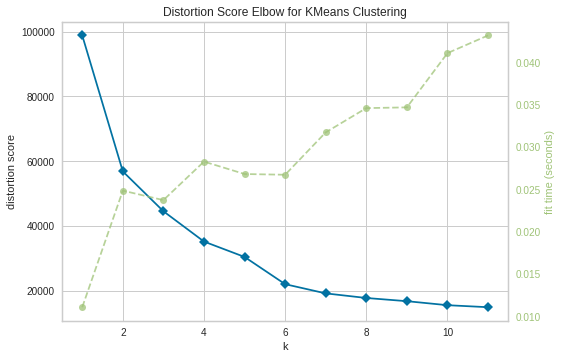

In [19]:
from yellowbrick.cluster import KElbowVisualizer, distortion_score
from sklearn.metrics import calinski_harabaz_score

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k = (1,12))
visualizer.fit(X)
visualizer.poof()

In [48]:
# output
print('----------K-Elbow Scoremap---------- \n')
print('--------Silhouette score--------\n', silhouette_score(X, kmeans.predict(X)))
print('--------Distortion score--------\n', distortion_score(X,
                                                             kmeans.fit(X).labels_,
                                                             metric = 'euclidean'))
print('--------Calinski Harabaz score--------\n', calinski_harabaz_score(X, kmeans.predict(X)))

----------K-Elbow Scoremap---------- 

--------Silhouette score--------
 0.5711381937868844
--------Distortion score--------
 44517.365104782315
--------Calinski Harabaz score--------
 561.815657860671


## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

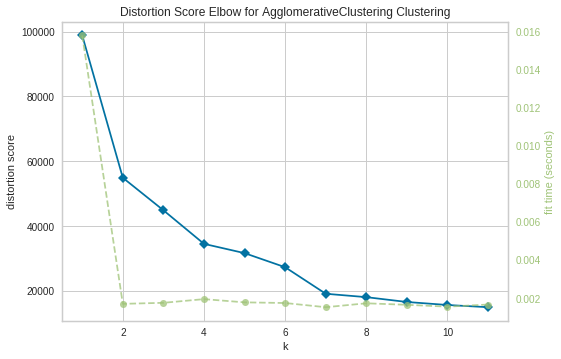

In [33]:
agg_model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(agg_model, k = (1,12))
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [65]:
agglo = cluster.AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
X['labels'] = agglo.labels_.astype(np.int)

/home/fred/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/fred/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/fred/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/fred/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


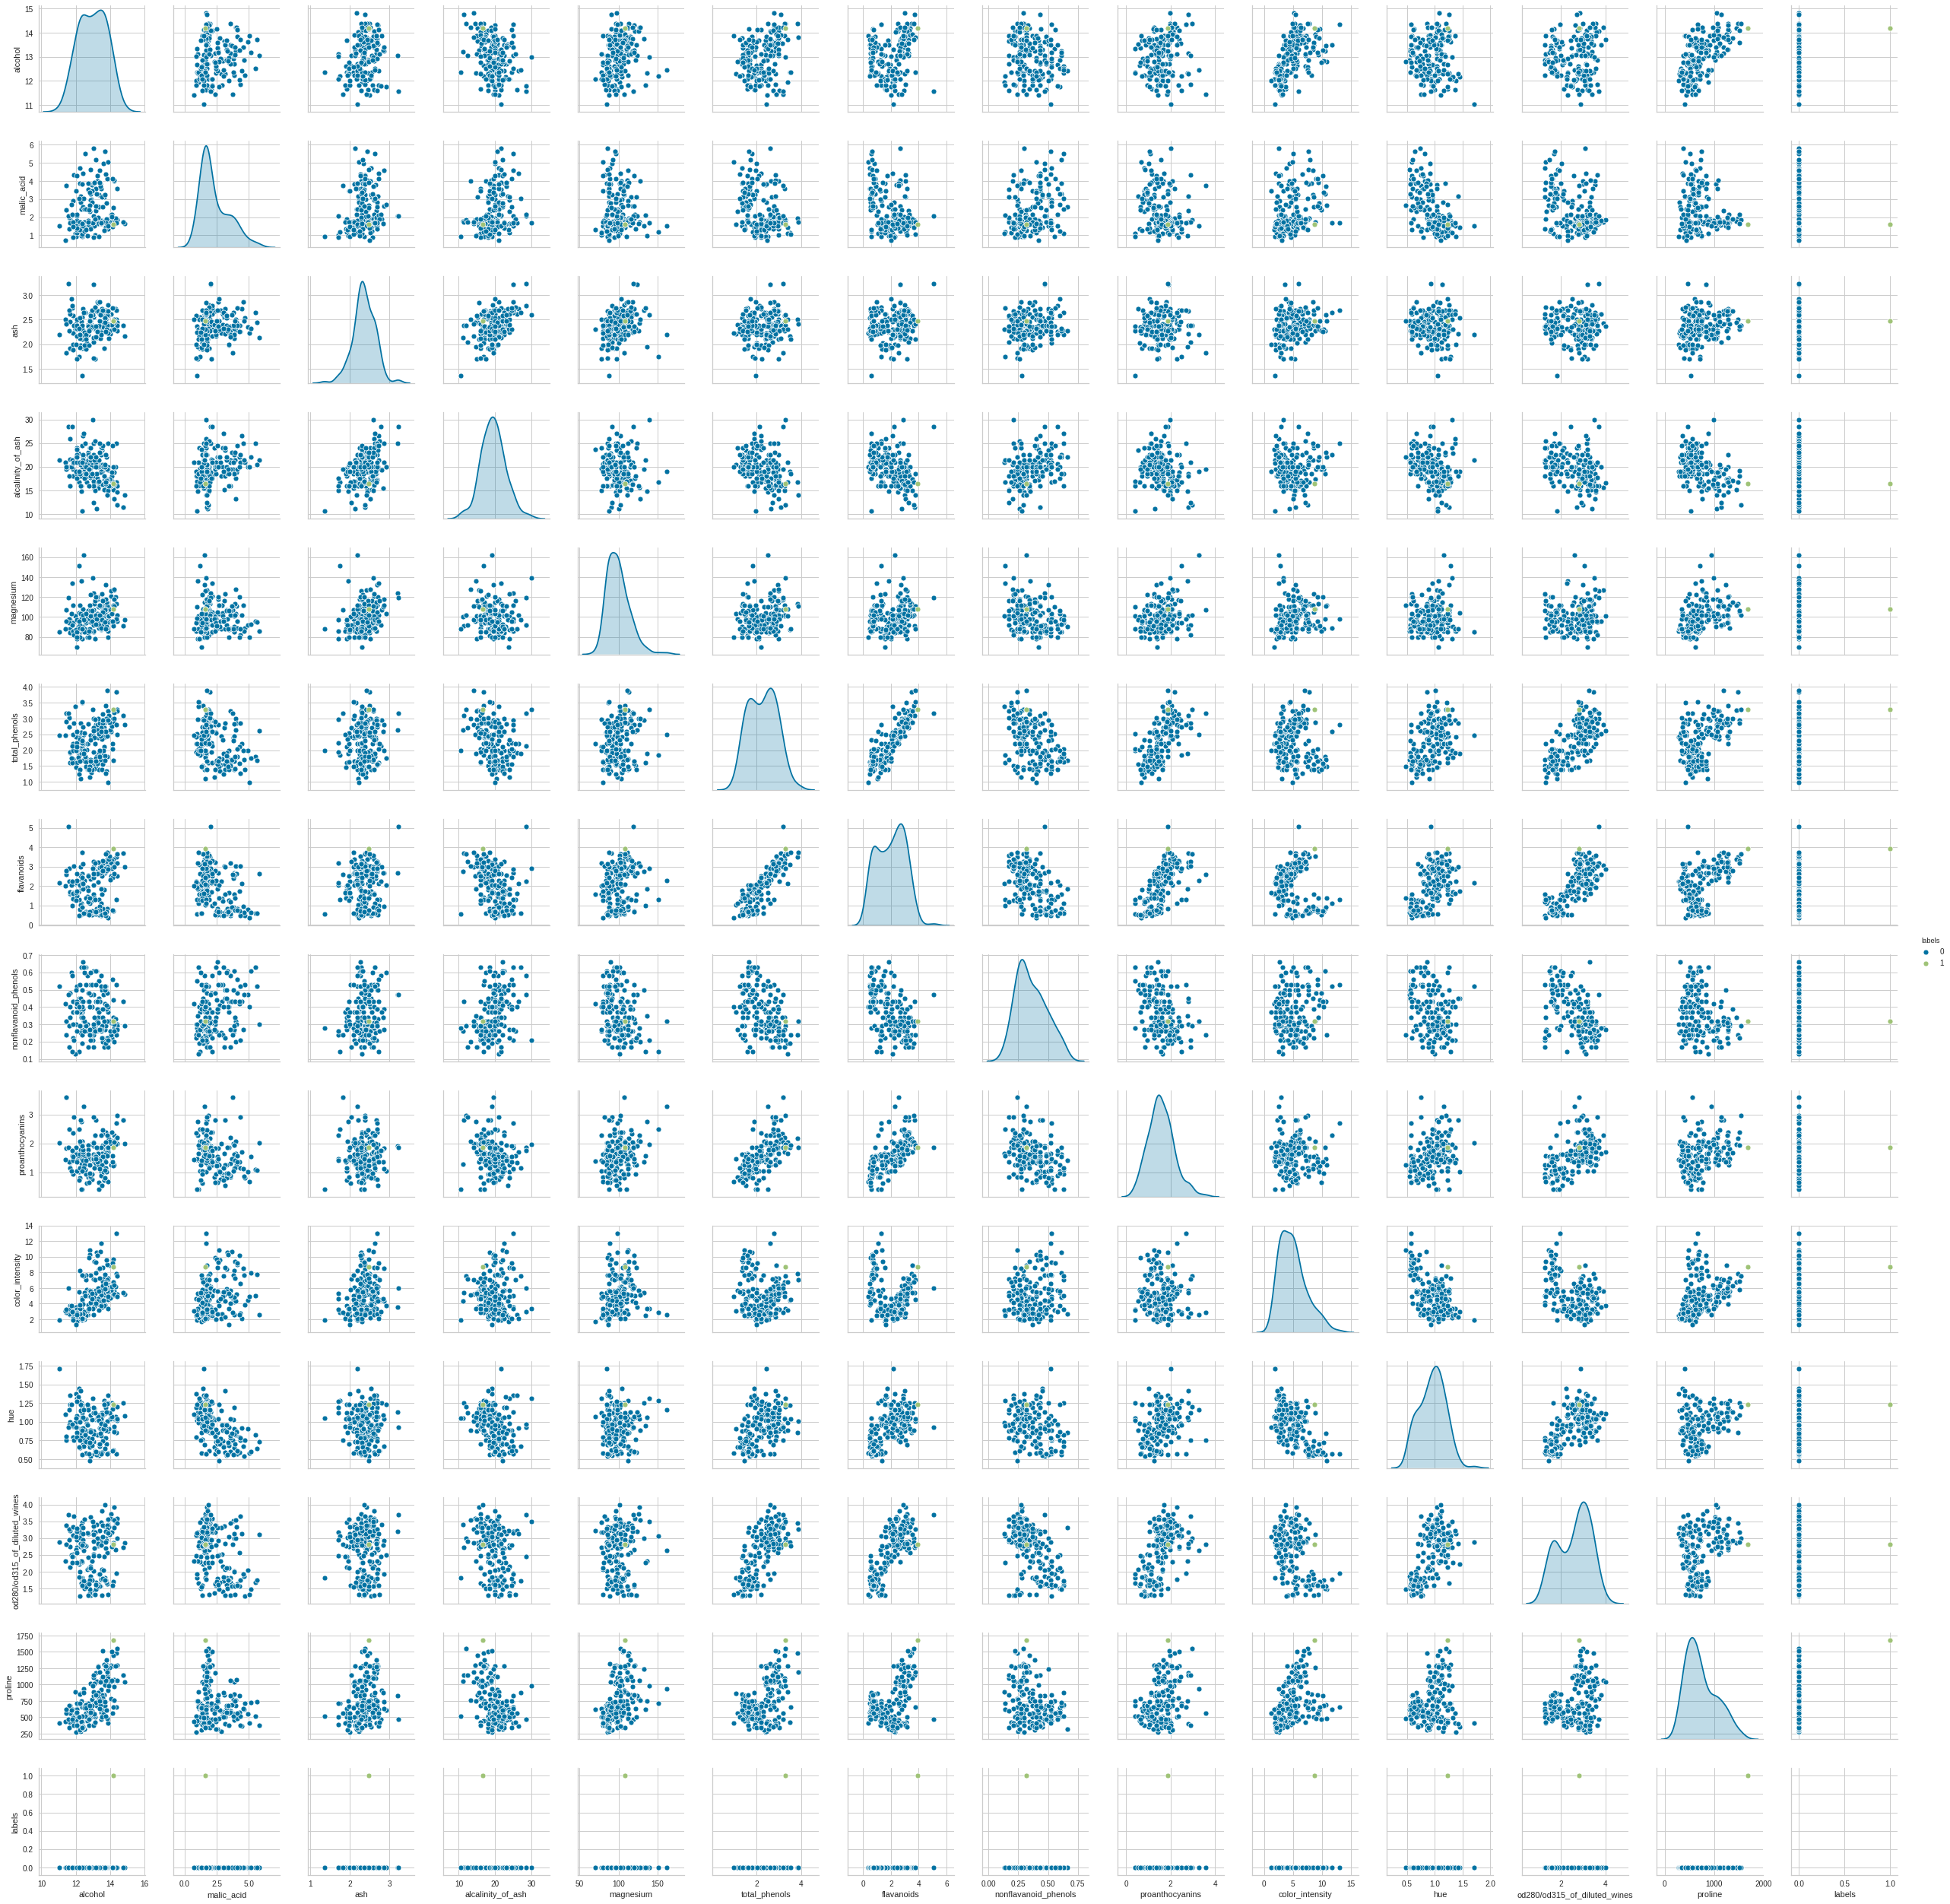

In [66]:
sns.pairplot(X, hue = 'labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

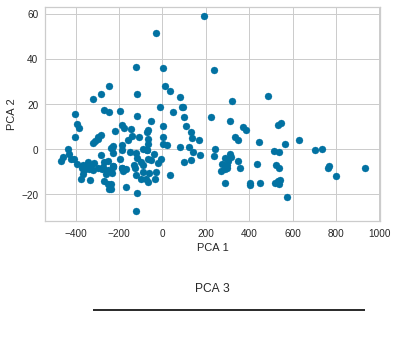

In [67]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize = (6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]


ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

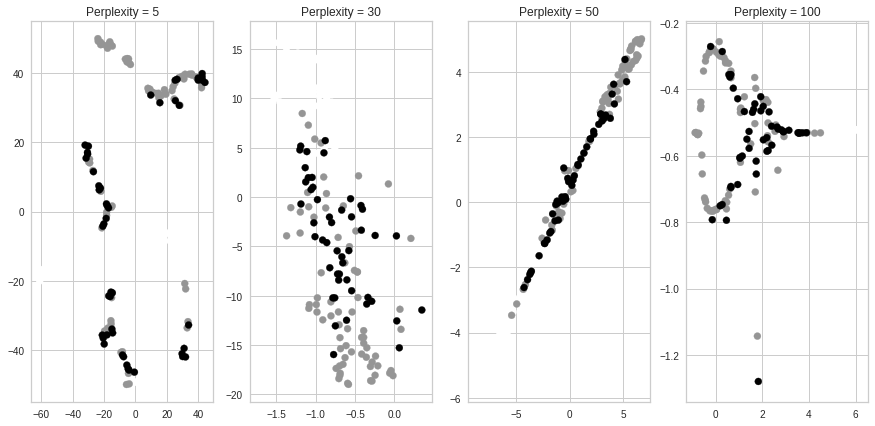

In [77]:
from sklearn.manifold import TSNE

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()